**Problem Statement: Build a sentiment analysis on twitter dataset using any deep learning technique.**

Dataset: https://www.kaggle.com/datasets/kazanova/sentiment140

**About Dataset**

**Context**

This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

**Content**
It contains the following 6 fields:

1. target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

2. ids: The id of the tweet ( 2087)

3. date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

4. flag: The query (lyx). If there is no query, then this value is NO_QUERY.

5. user: the user that tweeted (robotickilldozr)

6. text: the text of the tweet (Lyx is cool)

**Acknowledgements**

The official link regarding the dataset with resources about how it was generated is here
The official paper detailing the approach is here

Citation: Go, A., Bhayani, R. and Huang, L., 2009. Twitter sentiment classification using distant supervision. CS224N Project Report, Stanford, 1(2009), p.12.

## Loading and Visualisation
First let us import the dataset stored in the computer

In [1]:
import numpy as np
import pandas as pd
import re
df = pd.read_csv("C://Users//pavan//STARAGILE//sentiment twitter analysis.csv", encoding='ISO-8859-1')

In [2]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
# Define column names (replace with your own column names)
column_names = ["target", "ids", "date","flag","user","text"]  # Provide the appropriate column names

# Assign the column names to the DataFrame
df.columns = column_names

In [4]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


Lets only keep 'target' and 'text' columns for our analysis as other columns are irrelevant

In [5]:
# Keep only the "target" and "text" columns
df = df[["target", "text"]]

# Display the updated DataFrame
df.head()


,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   text    1599999 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB



The DataFrame has a shape of (1599999 rows, 2 columns). Here's a breakdown of the columns and some additional information:

>Column 0 (target): Contains integer values representing the sentiment polarity (0 for negative, 2 for neutral, and 4 for positive).

>Column 1 (text): Contains the text content of the tweets as objects (string data type).

>There are no missing values (non-null count is the same as the total number of entries).

>The "target" column is of type int64, while the "text" column is of type object (string).

>The memory usage of the DataFrame is approximately 24.4+ MB.

Check the shape of the dataframe

In [8]:
# Check the shape of the DataFrame
shape = df.shape

# Display the shape
print("Shape of the DataFrame:", shape)

Shape of the DataFrame: (1599999, 2)


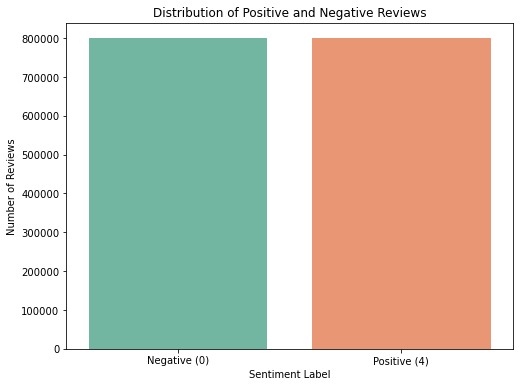

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of positive (4) and negative (0) reviews
sentiment_counts = df['target'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set2")
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Reviews')
plt.xticks([0, 1], ['Negative (0)', 'Positive (4)'])

# Show the plot
plt.show()

The above graph shows the reviews in twitter handles which has equal number of positive and negative reviews

## Data Pre-processing

In this steps initially we will remove all the punctuation marks and all the urls, digits, numbers etc.

In [12]:
import string

# Function to remove punctuation and split text into words
def process_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove newlines and split into words
    words = text.replace('\n', ' ').split()
    return words

# Apply the process_text function to the "text" column of your DataFrame
df['processed_text'] = df['text'].apply(process_text)

# Display the first few rows of the DataFrame with processed text
df[['text', 'processed_text']].head()


,text,processed_text
0,is upset that he can't update his Facebook by ...,"[is, upset, that, he, cant, update, his, Faceb..."
1,@Kenichan I dived many times for the ball. Man...,"[Kenichan, I, dived, many, times, for, the, ba..."
2,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
3,"@nationwideclass no, it's not behaving at all....","[nationwideclass, no, its, not, behaving, at, ..."
4,@Kwesidei not the whole crew,"[Kwesidei, not, the, whole, crew]"


In [15]:
import re

# Function to remove web addresses, Twitter IDs, and digits from text
def remove_patterns(words):
    # Join the list of words into a single string
    text = ' '.join(words)
    # Remove web addresses (URLs)
    text = re.sub(r'http\S+', '', text)
    # Remove Twitter IDs (mentions)
    text = re.sub(r'@\w+', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    return text

# Apply the remove_patterns function to the "processed_text" column
df['cleaned_text'] = df['processed_text'].apply(remove_patterns)

# Display the first few rows of the DataFrame with cleaned text
df[['processed_text', 'cleaned_text']].head()



,processed_text,cleaned_text
0,"[is, upset, that, he, cant, update, his, Faceb...",is upset that he cant update his Facebook by t...
1,"[Kenichan, I, dived, many, times, for, the, ba...",Kenichan I dived many times for the ball Manag...
2,"[my, whole, body, feels, itchy, and, like, its...",my whole body feels itchy and like its on fire
3,"[nationwideclass, no, its, not, behaving, at, ...",nationwideclass no its not behaving at all im ...
4,"[Kwesidei, not, the, whole, crew]",Kwesidei not the whole crew


Now all the data has been cleaned. We will next convert the text data to encoded data by tokenization

In [17]:
# Step 1: Build Vocabulary
vocab = set()
for text in df['cleaned_text']:
    words = text.split()
    vocab.update(words)

# Step 2: Create Word-to-Integer Mapping
word_to_int = {word: idx for idx, word in enumerate(vocab, start=1)}

# Step 3: Encode Text Data
def encode_text(text):
    words = text.split()
    return [word_to_int[word] for word in words]

# Apply encoding to the "cleaned_text" column
df['encoded_text'] = df['cleaned_text'].apply(encode_text)

# Display the first few rows of the DataFrame with encoded text
df[['cleaned_text', 'encoded_text']].head()


,cleaned_text,encoded_text
0,is upset that he cant update his Facebook by t...,"[169960, 496697, 385662, 748809, 277102, 50188..."
1,Kenichan I dived many times for the ball Manag...,"[465336, 850475, 629033, 513059, 8598, 601250,..."
2,my whole body feels itchy and like its on fire,"[842064, 399001, 365467, 536171, 508846, 17586..."
3,nationwideclass no its not behaving at all im ...,"[75233, 565059, 783986, 278229, 358302, 105038..."
4,Kwesidei not the whole crew,"[272903, 278229, 405433, 399001, 494318]"


In [18]:
# Check the shape of the DataFrame
shape = df.shape

# Display the shape
print("Shape of the DataFrame:", shape)

Shape of the DataFrame: (1599999, 5)


In [19]:
df.head()

,target,text,processed_text,cleaned_text,encoded_text
0,0,is upset that he can't update his Facebook by ...,"[is, upset, that, he, cant, update, his, Faceb...",is upset that he cant update his Facebook by t...,"[169960, 496697, 385662, 748809, 277102, 50188..."
1,0,@Kenichan I dived many times for the ball. Man...,"[Kenichan, I, dived, many, times, for, the, ba...",Kenichan I dived many times for the ball Manag...,"[465336, 850475, 629033, 513059, 8598, 601250,..."
2,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...",my whole body feels itchy and like its on fire,"[842064, 399001, 365467, 536171, 508846, 17586..."
3,0,"@nationwideclass no, it's not behaving at all....","[nationwideclass, no, its, not, behaving, at, ...",nationwideclass no its not behaving at all im ...,"[75233, 565059, 783986, 278229, 358302, 105038..."
4,0,@Kwesidei not the whole crew,"[Kwesidei, not, the, whole, crew]",Kwesidei not the whole crew,"[272903, 278229, 405433, 399001, 494318]"


As one can see now we have a dataframe containing all the necessary columns. Although we only require target and encoded _text column for our analysis.

Let's print out the number of unique words in the vocabulary and the contents of the first, tokenized review.

In [20]:
# Get the number of unique words in the vocabulary
num_unique_words = len(vocab)

# Get the contents of the first tokenized review
first_tokenized_review = df['encoded_text'][0]

# Print the results
print("Number of Unique Words in Vocabulary:", num_unique_words)
print("\nContents of the First Tokenized Review:")
print(first_tokenized_review)


Number of Unique Words in Vocabulary: 866643

Contents of the First Tokenized Review:
[169960, 496697, 385662, 748809, 277102, 501888, 230632, 265518, 625889, 169354, 336286, 175867, 534648, 118990, 111446, 539740, 860909, 332527, 157890, 576326, 93424]


To check the maximum review text data length, we can iterate through the encoded text in our DataFrame and find the length of each encoded review

In [21]:
# Find the maximum review text length
max_length = max(len(encoded_text) for encoded_text in df['encoded_text'])

# Print the maximum review text length
print("Maximum Review Text Length:", max_length)


Maximum Review Text Length: 41


For shortest review,

In [22]:
# Find the shortest review text length
min_length = min(len(encoded_text) for encoded_text in df['encoded_text'])

# Print the shortest review text length
print("Shortest Review Text Length:", min_length)

Shortest Review Text Length: 1


The maximum and minimum review lengths are  41 and 1 respectively.

Now we will so **padding** to ensure equal length of all reviews

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the maximum sequence length based on your data
max_sequence_length = 41  # Set it to the maximum review length in your data

# Pad the sequences in the encoded_text column
df['padded_encoded_text'] = pad_sequences(df['encoded_text'], maxlen=max_sequence_length, padding='post', truncating='post', value=0).tolist()

# Display the DataFrame with the padded sequences
df.head()

,target,text,processed_text,cleaned_text,encoded_text,padded_encoded_text
0,0,is upset that he can't update his Facebook by ...,"[is, upset, that, he, cant, update, his, Faceb...",is upset that he cant update his Facebook by t...,"[169960, 496697, 385662, 748809, 277102, 50188...","[169960, 496697, 385662, 748809, 277102, 50188..."
1,0,@Kenichan I dived many times for the ball. Man...,"[Kenichan, I, dived, many, times, for, the, ba...",Kenichan I dived many times for the ball Manag...,"[465336, 850475, 629033, 513059, 8598, 601250,...","[465336, 850475, 629033, 513059, 8598, 601250,..."
2,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...",my whole body feels itchy and like its on fire,"[842064, 399001, 365467, 536171, 508846, 17586...","[842064, 399001, 365467, 536171, 508846, 17586..."
3,0,"@nationwideclass no, it's not behaving at all....","[nationwideclass, no, its, not, behaving, at, ...",nationwideclass no its not behaving at all im ...,"[75233, 565059, 783986, 278229, 358302, 105038...","[75233, 565059, 783986, 278229, 358302, 105038..."
4,0,@Kwesidei not the whole crew,"[Kwesidei, not, the, whole, crew]",Kwesidei not the whole crew,"[272903, 278229, 405433, 399001, 494318]","[272903, 278229, 405433, 399001, 494318, 0, 0,..."


In [24]:
padded_sequences = df['padded_encoded_text'].values

# Loop through the first few rows and print the padded sequences
for i in range(5):  # Displaying the first 5 rows for example
    print(f"Padded Sequence {i + 1}:")
    print(padded_sequences[i])
    print("\n")


Padded Sequence 1:
[169960, 496697, 385662, 748809, 277102, 501888, 230632, 265518, 625889, 169354, 336286, 175867, 534648, 118990, 111446, 539740, 860909, 332527, 157890, 576326, 93424, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Padded Sequence 2:
[465336, 850475, 629033, 513059, 8598, 601250, 405433, 559327, 844639, 650431, 251900, 315576, 42770, 655162, 401707, 463699, 631581, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Padded Sequence 3:
[842064, 399001, 365467, 536171, 508846, 175867, 701103, 783986, 491374, 310925, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Padded Sequence 4:
[75233, 565059, 783986, 278229, 358302, 105038, 354659, 828923, 411971, 111687, 732349, 551620, 225241, 172544, 850475, 277102, 200567, 731448, 354659, 416935, 176657, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Padded Sequence 5:
[272903, 278229, 405433, 399001, 494318, 0, 0, 0, 0, 0, 0, 0,

Now we will split the data for Train, Test and Validation.

In [25]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = df['padded_encoded_text'].tolist()
y = df['target'].tolist()

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)




Now we have X_train, y_train for training, X_val, y_val for validation, and X_test, y_test for testing

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim = 100
# Define your model
model = Sequential()
model.add(Embedding(input_dim=num_unique_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/5
 9430/20000 [=============>................] - ETA: 2:15:25 - loss: -310.1271 - accuracy: 0.0000e+00

KeyboardInterrupt: 